### 

# <center> Interpretação de Variáveis Dummies em Modelos de Regressão Linear

___

## Objetivo

Este material tem três objetivos principais. Primeiro irá demonstrar como interpretar os parâmetros de variáveis dummies (categóricas) estimados pelo modelo de regresão linear, segundo fazer uma comparação entre os modelos estimados pelos pacotes statsmodels e sklearn com linguagem python e o pacote caret com linguagem R e finalmente demonstrar a interpretação de modelos utilizando tanto variáveis dummies quanto numéricas como preditores.

Dada as particularidades da interpretação do modelo de regressão linear utilizando variáveis dummies, é importante estar atento a maneira como os pacotes abordam a estimação dos parâmetros, principalmente do intercepto, visto que a presença ou ausência deste altera a interpreção dos parâmetros do modelo.

Não estamos propondo uma interpretação extaustiva utilizando outras estatíticas geradas pelo modelo como p-value, teste F ou outros testes, vamos tratar apenas das variáveis dummies.

## Descrição das variáveis

O exemplo abordado consta no capítulo 9 do livro do Livro Econometria Básica de Gujarati e Porter. Os dados representam os salários médios anuais em dólares de professores de escolas públicas dos EUA no ano de 2005 e estão dividos em 3 regiões: Nordeste/Centro Oeste, Sul e Oeste. 

O dataset apresenta 51 observações e 5 variáveis, sendo duas variáveis numéricas e as demais categóricas e dispensa tratamento.

Variáveis:
- Estate: Representa o estado
- Salary: Representa o salário médio dos professores
- Spending: Representa os gastos com escolas públicas por aluno
- D2:
    * 1 - Estado pertence a região Nordeste ou Norte Central
    * 0 - Estado NÂO pertence a região Nordeste ou Norte Central
- D3:
    * 1 - Estado pertence a região Sul
    * 0 - Estado NÃO pertence a região Sul

## Workflow

* Importação dos pacotes e dados
* EDA
* Parte 1 - Estimação e interpretação dos modelos utilizando apenas variáveis categóricas como estimadores.
    * Modelo com intercepto    
    * Modelo sem intercepto   
* Parte 2 - Comparação dos pacotes 
    * Comparação dos modelos estimados pelos pacotes statsmodels, sklearn em linguagem python e caret na linguagem R.
* Parte 3 - Estimação e interpretação dos modelos utilizando tanto variáveis categóricas quanto numéricas como estimadores.

___

# Pacotes e dados

In [1]:
# Importar pacotes
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importar dados
dados = pd.read_excel('dados/Damodar_Dataset/Table 9_1.xls', skiprows = 3)
dataframe = dados.copy()

In [3]:
# Visualisa
dataframe.head()

,State,Salary,Spending,D2,D3
0,Connecticut,60822,12436,1,0
1,Illinois,58246,9275,1,0
2,Indiana,47831,8935,1,0
3,Iowa,43130,7807,1,0
4,Kansas,43334,8373,1,0


___

## EDA

In [4]:
# check shape
dataframe.shape

(51, 5)

In [5]:
# check valore únicos
dataframe.nunique()

State       51
Salary      51
Spending    49
D2           2
D3           2
dtype: int64

In [6]:
# check valores ausentes
dataframe.isna().sum()

State       0
Salary      0
Spending    0
D2          0
D3          0
dtype: int64

___

# PARTE 1

# Subset com variáveis dummies

> ### Solução manual

Na primeira abordagem vamos utilizar apenas as variáveis dummies como variáveis preditoras. Vamos também calcular manualmente o salário médio filtrando o dataset por região.

In [7]:
# Subset
df = dataframe[['D2', 'D3', 'Salary']]

In [8]:
# South
south = dataframe.loc[df['D3'] == 1]
south_mean = round(south['Salary'].mean(), 1)

# NorthCenter_East
northCenter_East = dataframe.loc[df['D2'] == 1]
northCenter_East_mean = round(northCenter_East['Salary'].mean(), 1)

# west
west = dataframe.loc[(df['D2'] == 0) & (df['D3'] == 0)]
west_mean = round(west['Salary'].mean(), 1)

In [9]:
# Ver salário médio anual
print('South:', south_mean)
print('North East:', northCenter_East_mean )
print('West:', west_mean)

South: 46293.6
North East: 49538.7
West: 48014.6


___

## O problema da colinearidade perfeita com o uso de variáveis dummies

Quando um modelo de regressão linear é estimado utilizando variáveis dummies (categóricas) como preditoras, a interpretação dos parâmetros pode representar o valor médio de cada categoria ou a diferença entre as categorias e uma categoria-base.

* **Modelo com intercepto:**
    * O intercepto representa o valor médio da categoria-base. Neste exemplo a região Oeste. 
    * Os demais parâmetros representam a diferença entre o valor médio da categoria-base e o valor médio das demais categorias.
    
* **Modelo sem intercepto:**
    * O valor de cada parâmetro representa o valor médio da categoria.

Quando o modelo é estimado com o intercepto, as variáveis preditoras não podem receber todas as categorias, caso contrário existirá colinearidade perfeita entre variáveis, logo, os parâmetros serão indefinidos e o erro padrão infinito, ou seja, o modelo não pode ser estimado.

Esse problema fica evidente se reduzirmos o problema para duas categorias.
Note que para representar se o estado pertence ou não a região sul, podemos usar apenas a variável South. 

    - Se a observação recebe valor 1, pertence ao Sul.
    - Se a observação recebe valor 0, pertence a outra região.

In [10]:
# Exemplo
df_exemplo = pd.DataFrame({'Estate': ['A','B','C','D','E','F','G'],
                           'South': [0,1,1,0,0,0,1]})

df_exemplo

,Estate,South
0,A,0
1,B,1
2,C,1
3,D,0
4,E,0
5,F,0
6,G,1


Utilizar duas variáveis para representar duas categorias, como no dataframe abaixo, é desnecessário e gera colinearidade perfeita.

In [11]:
# Exemplo
df_exemplo = pd.DataFrame({'Estate': ['A','B','C','D','E','F','G'],
                           'South': [0,1,1,0,0,0,1],
                           'Other': [1,0,0,1,1,1,0]})

df_exemplo

,Estate,South,Other
0,A,0,1
1,B,1,0
2,C,1,0
3,D,0,1
4,E,0,1
5,F,0,1
6,G,1,0


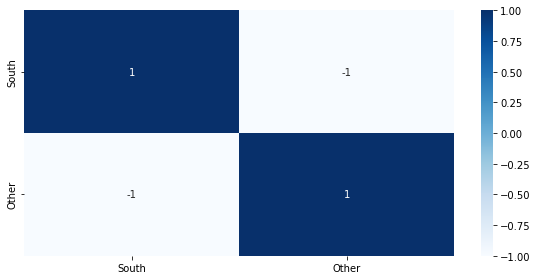

In [12]:
# View correlation
correlation = df_exemplo.corr()
plt.figure(figsize = (8, 4))
heatmap = sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, linewidths = 0, cmap = 'Blues')

plt.tight_layout()
plt.show()

Já temos os valores médios dos salários por região, temos uma visão geral sobre a interpretação dos parâmetros dada a presença ou ausência do intercepto e tratamos do problema da colinearidade perfeita.

Vamos estimar os modelos com e sem intercepto e interpretar os parâmetros em cada caso.

___


# Modelos

# Modelo com intercepto

Para fins de interpretação das variáveis dummies o modelo será estimado pelo pacote statsmodels. Na segunda parte faremos a comparação da estimação entre os pacotes.

> ### Modelo

In [13]:
# Set X and y
X = df[['D2', 'D3']]
y = df['Salary']

# Import 
import statsmodels.api as sm
 
# Model and fit
X_cte = sm.add_constant(X, has_constant = 'add')
lin_reg = sm.OLS(y, X_cte).fit()

# Parameters
lin_reg.params.round(2)

const    48014.62
D2        1524.10
D3       -1721.03
dtype: float64

Comparando o valor dos parâmetros com os valores médios encontrados manualmente.

In [14]:
# paramns
B0 = lin_reg.params[0]
B1 = lin_reg.params[1]
B2 = lin_reg.params[2]

# Print
print("B0: %.1f" % (B0))
print("West Mean: %.1f" % (west_mean))
print('-'*30)
print("B1: %.1f" % (B1))
print("B0 + B1: %.1f" % (B0 + B1))
print("NorthCenter/East Mean: %.1f" % (northCenter_East_mean))
print('-'*30)
print("B2: %.1f" % (B2))
print("B0 + B2: %.1f" % (B0 + B2))
print("South mean: %.1f" % (south_mean))
print('-'*30)

B0: 48014.6
West Mean: 48014.6
------------------------------
B1: 1524.1
B0 + B1: 49538.7
NorthCenter/East Mean: 49538.7
------------------------------
B2: -1721.0
B0 + B2: 46293.6
South mean: 46293.6
------------------------------


> ## Interpretação

O salário médio anual da região Oeste é de 48.014. O salário médio anual da região Nordeste/CentroNorte é 1.524 mais alto que o da região Oeste. Já o salário médio anual da região sul é 1.721 mais baixo que o da região Oeste.

___

# Modelo sem intercepto

Precisamos fazer uma pequena modificação no dataset para estimar o modelo sem o intercepto, pois nesse caso precisamos de todas as variáveis, ou seja, Sul, Nordeste/CentroNorte e Oeste.

> ### Novo dataset

In [15]:
# New dataset
dataframe['Region'] = ' '
dataframe.loc[df['D3'] == 1, 'Region'] = 'South'
dataframe.loc[df['D2'] == 1, 'Region'] = 'NorthCenterEast'
dataframe.loc[(df['D2'] == 0) & (df['D3'] == 0), 'Region'] = 'West'

# Create dummies
dummies = pd.get_dummies(dataframe['Region'], prefix = None)

# dataset final
df_final = pd.concat([dummies, dataframe['Salary']], axis = 1)

# save file
df_final.to_excel('dados/Damodar_Dataset/Table9_1_Pivot.xls', index = False)

# view
df_final.head()

,NorthCenterEast,South,West,Salary
0,1,0,0,60822
1,1,0,0,58246
2,1,0,0,47831
3,1,0,0,43130
4,1,0,0,43334


> ### Modelo

In [16]:
# Set X and y
X = df_final[['NorthCenterEast', 'South', 'West']]
y = df_final['Salary']

# import libraries
import statsmodels.api as sm
 
# build the model and fitting the data
lin_reg2 = sm.OLS(y, X).fit()

# Parameters
lin_reg2.params

NorthCenterEast    49538.714286
South              46293.588235
West               48014.615385
dtype: float64

Comparando o valor dos parâmetros com os valores médios encontrados manualmente.

In [17]:
# Salário da região Oeste
print("B0: NorthCenterEast: %.1f" % (lin_reg2.params[0]))
print("NorthCenterEast Mean: %.1f" % (northCenter_East_mean))
print('-'*35)
# Salário da região NorthCenter_East_mean
print("B1: South: %.1f" % (lin_reg2.params[1]))
print("South mean Mean: %.1f" % (south_mean))
print('-'*35)
# Salário da região Sul
print("B2: West: %.1f" % (lin_reg2.params[2]))
print("West mean: %.1f" % (west_mean))
print('-'*35)

B0: NorthCenterEast: 49538.7
NorthCenterEast Mean: 49538.7
-----------------------------------
B1: South: 46293.6
South mean Mean: 46293.6
-----------------------------------
B2: West: 48014.6
West mean: 48014.6
-----------------------------------


> ## Interpretação

Sem o intercepto, os parâmetros representam diretamente o valor médio dos salários por região. Os mesmos valores foram obtidos na solução manual, no modelo com intercepto somando o valor dos parâmetros ao valor da categoria base e agora no modelo sem intercepto.

___

# PARTE 2

# Stats models vs Sklearn vs Caret

## Modelo com intercepto

> ### Dados

In [18]:
df.head()

,D2,D3,Salary
0,1,0,60822
1,1,0,58246
2,1,0,47831
3,1,0,43130
4,1,0,43334


In [19]:
# Set X and y
X = df[['D2', 'D3']].astype('category')
y = df['Salary']

> ### Stats Models

In [20]:
# import libraries
import statsmodels.api as sm

# add cte
X_cte = sm.add_constant(X, has_constant = 'add')

# Criando o modelo
stats_linReg1 = sm.OLS(y, X_cte).fit()

# parameters
print(list(stats_linReg1.params.round(2)))

[48014.62, 1524.1, -1721.03]


> ### Skit Learn

In [21]:
# import libraries
from sklearn.linear_model import LinearRegression

# Criando o modelo
sklearn_linReg1 = LinearRegression().fit(X, y)

# Treinamento do modelo
print(np.append(sklearn_linReg1.intercept_, sklearn_linReg1.coef_).round(2))

[48014.62  1524.1  -1721.03]


Para criar o modelo com intercepto no stats model é necessário adicionar uma constante na matriz X, enquanto no sklearn, como default, o modelo é criado com intercepto.

> ### Caret com R e com intercepto

In [22]:
from IPython.display import Image
Image(url = 'dados/images/LinearModel_Caret_WithIntercept.jpg')

O intercepto é default usando caret e linguagem R.

___

## Sem intercepto

> ### Dados

In [23]:
# View
df_final.head()

,NorthCenterEast,South,West,Salary
0,1,0,0,60822
1,1,0,0,58246
2,1,0,0,47831
3,1,0,0,43130
4,1,0,0,43334


In [24]:
# Set X and y
X = df_final[['NorthCenterEast', 'South', 'West']]
y = df_final['Salary']

> ### Stats Model 

In [25]:
# Import libraries
import statsmodels.api as sm

# Criando o modelo
stats_linReg2 = sm.OLS(y, X).fit()

# parameters
print(list(stats_linReg2.params.round(2)))

[49538.71, 46293.59, 48014.62]


> ### Skit Learn

In [26]:
# Import libraries
from sklearn.linear_model import LinearRegression

# Criando o modelo
sklearn_linReg2 = LinearRegression(fit_intercept = False).fit(X, y)

# Treinamento do modelo
print(np.append(sklearn_linReg2.intercept_, sklearn_linReg2.coef_).round(2))

[    0.   49538.71 46293.59 48014.62]


Como default, o stats model cria o modelo sem o intercepto, enquanto no sklearn para criar o modelo sem o intercepto é necessário definir o parâmetro fit_intercept como False.

> ### Caret com R e sem intercepto

In [27]:
from IPython.display import Image
Image(url = 'dados/images/LinearModel_Caret_NoIntercept.jpg')

Para gerar o modelo sem intercepto usando linguagem e caret é necessário informar FALSE para o parâmetro intercepto.

___

# PARTE 3

# Uso de variáveis dummies e numéricas em conjunto como preditoras

## Imports

In [28]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import statsmodels.api as sm

In [29]:
# Load data
df_int = pd.read_excel('dados/Damodar_Dataset/Table 9_1.xls', skiprows = 3)

___

# Modelos

# Com intercepto

> ### Model

In [30]:
# View
df_int.head()

,State,Salary,Spending,D2,D3
0,Connecticut,60822,12436,1,0
1,Illinois,58246,9275,1,0
2,Indiana,47831,8935,1,0
3,Iowa,43130,7807,1,0
4,Kansas,43334,8373,1,0


In [31]:
# Set X and y
X = df_int[['D2', 'D3', 'Spending']]
y = df_int['Salary']

# Import 
import statsmodels.api as sm
 
# Model and fit
X_cte = sm.add_constant(X, has_constant = 'add')
lin_reg = sm.OLS(y, X_cte).fit()

# Parameters
lin_reg.params.round(2)

const       28694.92
D2          -2954.13
D3          -3112.19
Spending        2.34
dtype: float64

> ## Interpretação

Controlando a variável Spending no modelo, o salário médio anual da região Oeste é de 28.694. O salário médio anual da região Nordeste/CentroNorte é 2.954 mais baixo que o da região Oeste, isto é,  25.740. Já o salário médio anual da região sul é de 25.582, 3.112,19 mais baixo que o da região Oeste. 

O parâmetro de spending mostra que para cada dólar adicional de gasto público por aluno, *ceteris paribus*, espera-se que o salário do professor aumente $2,34.

Vale destacar que neste caso podemos definir 3 equações para calcular o salário dos professores em função dos gastos por aluno, uma para cada região.

- $ \hat{y} = 28694 + 2.34x_i $ : Oeste
- $ \hat{y} = 25740 + 2.34x_i $ : Nordeste/CentroNorte
- $ \hat{y} = 25582 + 2.34x_i $ : Sul

Onde $ x_i $ é o gasto público por aluno.

Mesmo definido 3 equações, estatisticamente elas são a mesma. No modelo seguinte isso fica claro.

# Sem intercepto

> ### Modelo

In [32]:
# New dataset
df_int['Region'] = ' '
df_int.loc[df['D3'] == 1, 'Region'] = 'South'
df_int.loc[df['D2'] == 1, 'Region'] = 'NorthCenterEast'
df_int.loc[(df['D2'] == 0) & (df['D3'] == 0), 'Region'] = 'West'

# Create dummies
dummies = pd.get_dummies(dataframe['Region'], prefix = None)

# dataset final
df_noint = pd.concat([dummies, dataframe[['Spending' ,'Salary']]], axis = 1)
df_noint.head()

,NorthCenterEast,South,West,Spending,Salary
0,1,0,0,12436,60822
1,1,0,0,9275,58246
2,1,0,0,8935,47831
3,1,0,0,7807,43130
4,1,0,0,8373,43334


In [33]:
# Set X and y
X = df_noint[['NorthCenterEast', 'South', 'West', 'Spending']]
y = df_noint['Salary']

# Import 
import statsmodels.api as sm
 
# Model and fit
lin_reg = sm.OLS(y, X).fit()

# Parameters
lin_reg.params.round(2)

NorthCenterEast    25740.79
South              25582.72
West               28694.92
Spending               2.34
dtype: float64

> ## Interpretação

Estimando o modelo sem o intercepto é possível verificar rapidamente que os salários médios são próprios parâmetros estimados e o parâmetro da variável spending é o mesmo do modelo anterior.

Nesse caso para calcular o salário dos professores de uma região em função dos gastos por aluno, basta definir como zero as variáveis das outras regiões e teremos as mesmas equações encontradas anteriormente.

- $ \hat{y} = 28694 + 2.34x_i $ : Oeste
- $ \hat{y} = 25740 + 2.34x_i $ : Nordeste/CentroNorte
- $ \hat{y} = 25582 + 2.34x_i $ : Sul

Onde $ x_i $ é o gasto público por aluno.

___